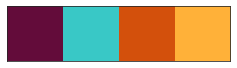

In [ ]:
#import library
import pandas as pd 
import numpy as np 
import os 

%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from sklearn import preprocessing

Import CSV
Import CSV dari sumber playlist yaitu Top50 Indonesia, Top50 Global, dan 1000 all the time. 

In [ ]:
#import CSV 
dfIndo = pd.read_csv("/content/drive/MyDrive/Tugas Frequent Data Mining/spotifyindo_29.csv")
dfIndo

,Unnamed: 0,artist,album,track_name,popularity,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Hindia,Menari Dengan Bayangan,Evaluasi,80,2dIBMHByUGcNPzmYBJ6OAj,0.609,0.966,7,-4.469,1,0.0571,0.000003,0.3040,0.5050,102.014,194469,4
1,1,d4vd,Here With Me,Here With Me,88,78Sw5GDo6AlGwTwanjXbGh,0.574,0.469,4,-8.209,1,0.0254,0.000092,0.1280,0.2880,132.023,242485,4
2,2,Mario G klau,Semata Karenamu,Semata Karenamu,74,4z6FksNI6MLCDTHrNJXhO0,0.603,0.325,3,-11.683,1,0.0456,0.000000,0.1130,0.3230,123.759,278500,4
3,3,Feby Putri,Runtuh,Runtuh,80,6Hii26x3qDErVitnGW8QtO,0.593,0.287,3,-13.164,1,0.0289,0.000136,0.1190,0.1910,127.783,223974,4
4,4,Budi Doremi,Tak Kan Hilang,Tak Kan Hilang,75,1USA6DXJ1qsucoKnDu4vnu,0.527,0.258,4,-9.499,1,0.0319,0.000172,0.1480,0.3470,139.928,241714,4
5,5,Soegi Bornean,Asmalibrasi,Asmalibrasi,80,3TFdXrYIubXABQh0CxIiSs,0.721,0.565,4,-6.208,1,0.0292,0.000005,0.0973,0.7940,139.941,254862,4
6,6,Stacey Ryan,Fall In Love Alone,Fall In Love Alone,83,5xwBIieMMFUmLDgvG4DjFe,0.676,0.625,7,-5.455,0,0.0711,0.000119,0.1270,0.5220,171.883,205428,4
7,7,Lyodra,Sang Dewi,Sang Dewi,80,5fDCy4Hse30ZsjaTUGKVh5,0.339,0.580,6,-5.426,1,0.0319,0.000022,0.4210,0.3190,81.857,247994,4
8,8,Awdella,Tertawan Hati,Tertawan Hati,76,3i0h88q1HBtbdIg2bPxs54,0.319,0.432,6,-5.831,1,0.0317,0.000000,0.1080,0.2440,128.244,237864,4
9,9,Stephen Sanchez,Easy On My Eyes,Until I Found You,84,6VhuP99TE6gYNQRJIlAWFD,0.346,0.500,10,-6.097,1,0.0388,0.000000,0.1890,0.1910,202.466,176667,3


In [ ]:
dfGlob= pd.read_csv("/content/drive/MyDrive/Tugas Frequent Data Mining/spotifyglobal_29.csv")
dfGlob

,Unnamed: 0,artist,album,track_name,popularity,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Sam Smith,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,3nqQXoyQOWXiESFLlDF1hG,0.714,0.472,2,-7.375,1,0.0864,0.000005,0.2660,0.2380,131.121,156943,4
1,1,Taylor Swift,Midnights,Anti-Hero,97,0V3wPSX9ygBnCm8psDIegu,0.637,0.643,4,-6.571,1,0.0519,0.000002,0.1420,0.5330,97.008,200690,4
2,2,Drake,Her Loss,Rich Flex,95,1bDbXMyjaUIooNwFE9wn0N,0.561,0.520,11,-9.342,0,0.2440,0.000002,0.3550,0.4240,153.150,239360,3
3,3,Harry Styles,Harry's House,As It Was,91,4Dvkj6JhhA12EX05fT7y2e,0.520,0.731,6,-5.338,0,0.0557,0.001010,0.3110,0.6620,173.930,167303,4
4,4,Manuel Turizo,La Bachata,La Bachata,97,5ww2BF9slyYgNOk37BlC4u,0.835,0.679,7,-5.329,0,0.0364,0.000002,0.2180,0.8500,124.980,162638,4
5,5,David Guetta,I'm Good (Blue),I'm Good (Blue),97,4uUG5RXrOk84mYEfFvj3cK,0.561,0.965,7,-3.673,0,0.0343,0.000007,0.3710,0.3040,128.040,175238,4
6,6,Mariah Carey,Merry Christmas,All I Want for Christmas Is You,91,0bYg9bo50gSsH3LtXe2SQn,0.336,0.627,7,-7.463,1,0.0384,0.000000,0.0708,0.3500,150.273,241107,4
7,7,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",97,2tTmW7RDtMQtBk7m2rYeSw,0.621,0.782,2,-5.548,1,0.0440,0.033000,0.2300,0.5500,128.033,198938,4
8,8,Meghan Trainor,Takin' It Back,Made You Look,92,0QHEIqNKsMoOY5urbzN48u,0.838,0.525,10,-3.562,1,0.0665,0.000002,0.0771,0.8840,144.981,134256,4
9,9,Chris Brown,Indigo (Extended),Under The Influence,95,5IgjP7X4th6nMNDh4akUHb,0.733,0.690,9,-5.529,0,0.0427,0.000001,0.1050,0.3100,116.992,184613,4


In [ ]:
df1000 = pd.read_csv("/content/drive/MyDrive/Tugas Frequent Data Mining/spotify1000_30.csv")
df1000

,Unnamed: 0,artist,album,track_name,popularity,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Queen,A Night At The Opera (2011 Remaster),Bohemian Rhapsody - Remastered 2011,81,4u7EnebtmKWzUH433cf5Qv,0.414,0.404,0,-9.928,0,0.0499,0.000000,0.3000,0.224,71.105,354320,4
1,1,Guns N' Roses,Appetite For Destruction,Sweet Child O' Mine,83,7o2CTH4ctstm8TNelqjb51,0.454,0.910,6,-7.766,1,0.0448,0.099600,0.1160,0.629,125.116,354520,4
2,2,Nirvana,Nevermind (Deluxe Edition),Smells Like Teen Spirit,82,4CeeEOM32jQcH3eN9Q2dGj,0.502,0.912,1,-4.556,1,0.0564,0.000173,0.1060,0.720,116.761,301920,4
3,3,John Lennon,Imagine,Imagine - Remastered 2010,77,7pKfPomDEeI4TPT6EOYjn9,0.547,0.257,0,-12.358,1,0.0252,0.183000,0.0935,0.169,75.752,187867,4
4,4,John Farnham,Collections,You're the Voice,61,5NwkWwfRJaT55hEPtCmJHx,0.369,0.762,10,-8.993,1,0.0464,0.000028,0.5790,0.644,84.957,302107,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Michael Jackson,Thriller 25 Super Deluxe Edition,Billie Jean,83,5ChkMS8OtdzJeqyybCc9R5,0.920,0.654,11,-3.051,0,0.0401,0.015300,0.0360,0.847,117.046,293827,4
96,96,Ed Sheeran,x (Deluxe Edition),Thinking out Loud,83,34gCuhDGsG4bRPIf9bb02f,0.781,0.445,2,-6.061,1,0.0295,0.000000,0.1840,0.591,78.998,281560,4
97,97,Neil Diamond,Sweet Caroline,Sweet Caroline,77,62AuGbAkt8Ox2IrFFb8GKV,0.529,0.127,11,-16.066,1,0.0274,0.000109,0.2370,0.578,63.050,203573,4
98,98,Dire Straits,Brothers In Arms (Remastered),Money For Nothing - Remastered 1996,66,4nFNJmjfgBF7jwv2oBC45b,0.674,0.649,2,-9.321,0,0.0356,0.000766,0.0644,0.645,134.212,505333,4


In [ ]:
#merge data menjadi 1 dataframe
data = [dfIndo, dfGlob, df1000]
playlist_df = pd.concat(data)
playlist_df

,Unnamed: 0,artist,album,track_name,popularity,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Hindia,Menari Dengan Bayangan,Evaluasi,80,2dIBMHByUGcNPzmYBJ6OAj,0.609,0.966,7,-4.469,1,0.0571,0.000003,0.3040,0.505,102.014,194469,4
1,1,d4vd,Here With Me,Here With Me,88,78Sw5GDo6AlGwTwanjXbGh,0.574,0.469,4,-8.209,1,0.0254,0.000092,0.1280,0.288,132.023,242485,4
2,2,Mario G klau,Semata Karenamu,Semata Karenamu,74,4z6FksNI6MLCDTHrNJXhO0,0.603,0.325,3,-11.683,1,0.0456,0.000000,0.1130,0.323,123.759,278500,4
3,3,Feby Putri,Runtuh,Runtuh,80,6Hii26x3qDErVitnGW8QtO,0.593,0.287,3,-13.164,1,0.0289,0.000136,0.1190,0.191,127.783,223974,4
4,4,Budi Doremi,Tak Kan Hilang,Tak Kan Hilang,75,1USA6DXJ1qsucoKnDu4vnu,0.527,0.258,4,-9.499,1,0.0319,0.000172,0.1480,0.347,139.928,241714,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Michael Jackson,Thriller 25 Super Deluxe Edition,Billie Jean,83,5ChkMS8OtdzJeqyybCc9R5,0.920,0.654,11,-3.051,0,0.0401,0.015300,0.0360,0.847,117.046,293827,4
96,96,Ed Sheeran,x (Deluxe Edition),Thinking out Loud,83,34gCuhDGsG4bRPIf9bb02f,0.781,0.445,2,-6.061,1,0.0295,0.000000,0.1840,0.591,78.998,281560,4
97,97,Neil Diamond,Sweet Caroline,Sweet Caroline,77,62AuGbAkt8Ox2IrFFb8GKV,0.529,0.127,11,-16.066,1,0.0274,0.000109,0.2370,0.578,63.050,203573,4
98,98,Dire Straits,Brothers In Arms (Remastered),Money For Nothing - Remastered 1996,66,4nFNJmjfgBF7jwv2oBC45b,0.674,0.649,2,-9.321,0,0.0356,0.000766,0.0644,0.645,134.212,505333,4


# Cleaning the Data 

In [ ]:
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 99
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        200 non-null    int64  
 1   artist            200 non-null    object 
 2   album             200 non-null    object 
 3   track_name        200 non-null    object 
 4   popularity        200 non-null    int64  
 5   track_id          200 non-null    object 
 6   danceability      200 non-null    float64
 7   energy            200 non-null    float64
 8   key               200 non-null    int64  
 9   loudness          200 non-null    float64
 10  mode              200 non-null    int64  
 11  speechiness       200 non-null    float64
 12  instrumentalness  200 non-null    float64
 13  liveness          200 non-null    float64
 14  valence           200 non-null    float64
 15  tempo             200 non-null    float64
 16  duration_ms       200 non-null    int64  
 17

In [ ]:
#drop kolom yang tidak dibutuhkan
playlist_df= playlist_df.drop(['Unnamed: 0','track_id','speechiness','instrumentalness','liveness','mode','key','time_signature'],axis=1)
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist        200 non-null    object 
 1   album         200 non-null    object 
 2   track_name    200 non-null    object 
 3   popularity    200 non-null    int64  
 4   danceability  200 non-null    float64
 5   energy        200 non-null    float64
 6   loudness      200 non-null    float64
 7   valence       200 non-null    float64
 8   tempo         200 non-null    float64
 9   duration_ms   200 non-null    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 17.2+ KB


In [ ]:
#cek duplicate 
duplicate = playlist_df[playlist_df.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,artist,album,track_name,popularity,danceability,energy,loudness,valence,tempo,duration_ms
0,Sam Smith,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,0.714,0.472,-7.375,0.238,131.121,156943
1,Taylor Swift,Midnights,Anti-Hero,97,0.637,0.643,-6.571,0.533,97.008,200690
3,Harry Styles,Harry's House,As It Was,91,0.520,0.731,-5.338,0.662,173.930,167303
8,Meghan Trainor,Takin' It Back,Made You Look,92,0.838,0.525,-3.562,0.884,144.981,134256
10,Jung Kook,Dreamers [Music from the FIFA World Cup Qatar ...,Dreamers [Music from the FIFA World Cup Qatar ...,89,0.710,0.879,-4.218,0.341,114.993,201391
18,Stephen Sanchez,Easy On My Eyes,Until I Found You,84,0.346,0.500,-6.097,0.191,202.466,176667
27,Arctic Monkeys,AM,I Wanna Be Yours,92,0.464,0.417,-9.345,0.479,67.528,183956
37,Joji,SMITHEREENS,Glimpse of Us,83,0.440,0.317,-9.258,0.268,169.914,233456
41,d4vd,Here With Me,Here With Me,88,0.574,0.469,-8.209,0.288,132.023,242485


In [ ]:
#drop duplikat data
playlist_df = playlist_df.drop_duplicates(keep='first')

In [ ]:
playlist_df

,artist,album,track_name,popularity,danceability,energy,loudness,valence,tempo,duration_ms
0,Hindia,Menari Dengan Bayangan,Evaluasi,80,0.609,0.966,-4.469,0.505,102.014,194469
1,d4vd,Here With Me,Here With Me,88,0.574,0.469,-8.209,0.288,132.023,242485
2,Mario G klau,Semata Karenamu,Semata Karenamu,74,0.603,0.325,-11.683,0.323,123.759,278500
3,Feby Putri,Runtuh,Runtuh,80,0.593,0.287,-13.164,0.191,127.783,223974
4,Budi Doremi,Tak Kan Hilang,Tak Kan Hilang,75,0.527,0.258,-9.499,0.347,139.928,241714
...,...,...,...,...,...,...,...,...,...,...
95,Michael Jackson,Thriller 25 Super Deluxe Edition,Billie Jean,83,0.920,0.654,-3.051,0.847,117.046,293827
96,Ed Sheeran,x (Deluxe Edition),Thinking out Loud,83,0.781,0.445,-6.061,0.591,78.998,281560
97,Neil Diamond,Sweet Caroline,Sweet Caroline,77,0.529,0.127,-16.066,0.578,63.050,203573
98,Dire Straits,Brothers In Arms (Remastered),Money For Nothing - Remastered 1996,66,0.674,0.649,-9.321,0.645,134.212,505333


In [ ]:
#check null value
playlist_df.isnull().sum()

artist          0
album           0
track_name      0
popularity      0
danceability    0
energy          0
loudness        0
valence         0
tempo           0
duration_ms     0
dtype: int64

In [ ]:
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist        191 non-null    object 
 1   album         191 non-null    object 
 2   track_name    191 non-null    object 
 3   popularity    191 non-null    int64  
 4   danceability  191 non-null    float64
 5   energy        191 non-null    float64
 6   loudness      191 non-null    float64
 7   valence       191 non-null    float64
 8   tempo         191 non-null    float64
 9   duration_ms   191 non-null    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 16.4+ KB


In [ ]:
#playlist_df.to_csv('mergedPlaylist Cleaning.csv') #save to csv for visualization 

In [ ]:
# Correlation untuk melihat korelasi antar atribut pada dataset 
playlist_df.corr()

,popularity,danceability,energy,loudness,valence,tempo,duration_ms,label
popularity,1.000000,0.207217,-0.171164,0.105126,-0.188347,-0.036194,-0.278408,0.032110
danceability,0.207217,1.000000,0.124301,0.118814,0.465477,-0.184749,-0.305581,-0.156869
energy,-0.171164,0.124301,1.000000,0.653432,0.384479,0.128591,0.025041,-0.174777
loudness,0.105126,0.118814,0.653432,1.000000,0.046862,0.170380,-0.180986,-0.100100
valence,-0.188347,0.465477,0.384479,0.046862,1.000000,-0.036569,-0.112381,-0.089626
tempo,-0.036194,-0.184749,0.128591,0.170380,-0.036569,1.000000,0.015777,-0.499716
duration_ms,-0.278408,-0.305581,0.025041,-0.180986,-0.112381,0.015777,1.000000,-0.080324
label,0.032110,-0.156869,-0.174777,-0.100100,-0.089626,-0.499716,-0.080324,1.000000


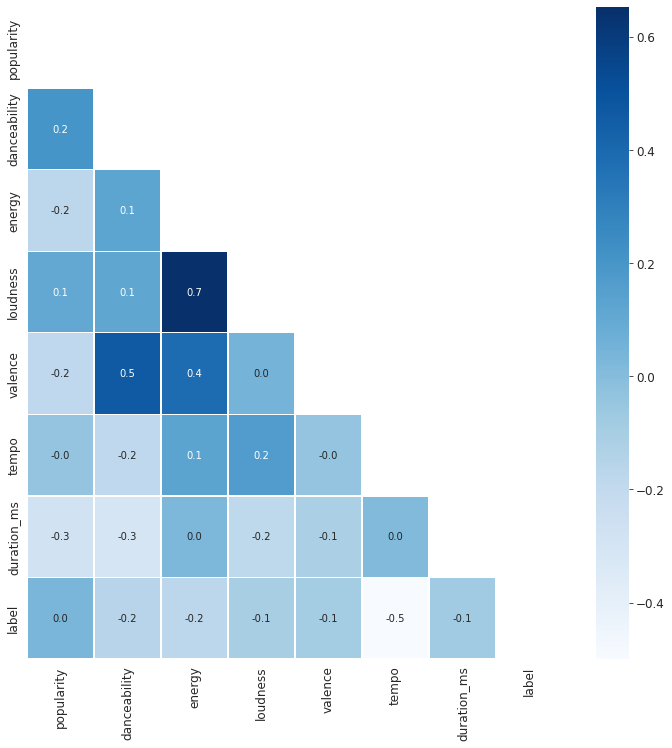

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(playlist_df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(playlist_df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

Pada grafik terlihat bahwa korelasi antara loudness dan energi sebesar 0.7 yang mana merupakan korelasi paling tinggi diantara yang lainnya. Hal ini menunjukkan bahwa atribut bisa digunakan salah satu. Dalam hal ini kami menggunakan atribut energy.

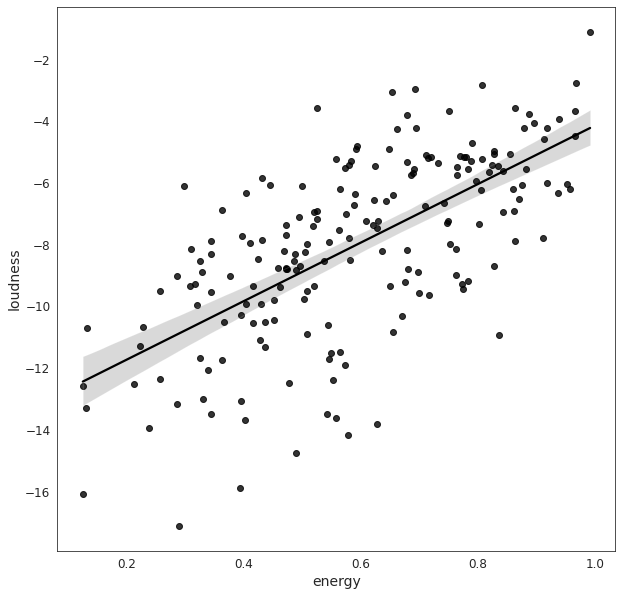

In [ ]:
#analisis korelasi antara energy dan loudness
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='energy',y='loudness',data=playlist_df,color='black')

Dari grafik tersebut juga dapat terlihat kuatnya korelasi antara loudness dan energy sehingga bisa diambil salah satu saja. 

# Clustering


In [ ]:
#menghapus judul lagu, nama artis, popularity, album, loudness, dan durasi sebelum melakukan clustering
music_features = playlist_df.copy()
music_features = music_features.drop(['popularity','album','track_name','artist','loudness','duration_ms'], axis=1)
music_features

,danceability,energy,valence,tempo
0,0.609,0.966,0.505,102.014
1,0.574,0.469,0.288,132.023
2,0.603,0.325,0.323,123.759
3,0.593,0.287,0.191,127.783
4,0.527,0.258,0.347,139.928
...,...,...,...,...
95,0.920,0.654,0.847,117.046
96,0.781,0.445,0.591,78.998
97,0.529,0.127,0.578,63.050
98,0.674,0.649,0.645,134.212


Music features yang digunakan yaitu dancebility, energy, valence, dan tempo.
Algoritma clustering yang kami gunakan adalah K-Means Clustering dengan mengelompokkan data yang mirip ke dalam satu K kelompok dan menemukan pola yang mendasari kelompok tersebut. 

Untuk menentukan nilai K yang optimal dapat digunakan metode Elbow. Dengan menjalankan K-Means pada range k (1-15) dan melakukan plotting jumlah rata rata jarak kuadrat ke pusat klaster dengan jumlah klaster untuk menemukan "elbow". 

In [ ]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(music_features)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(music_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (music_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5084451505618481)
For n_clusters = 3, silhouette score is 0.595312749994031)
For n_clusters = 4, silhouette score is 0.5480637439952298)
For n_clusters = 5, silhouette score is 0.5888763870966501)
For n_clusters = 6, silhouette score is 0.5939571274064583)
For n_clusters = 7, silhouette score is 0.5875932108388051)
For n_clusters = 8, silhouette score is 0.5653696720320748)
For n_clusters = 9, silhouette score is 0.5827314752918579)
For n_clusters = 10, silhouette score is 0.5778846789185826)
For n_clusters = 11, silhouette score is 0.5891889052410716)
For n_clusters = 12, silhouette score is 0.5855996438133863)
For n_clusters = 13, silhouette score is 0.5739074464987536)
For n_clusters = 14, silhouette score is 0.5610026823445767)


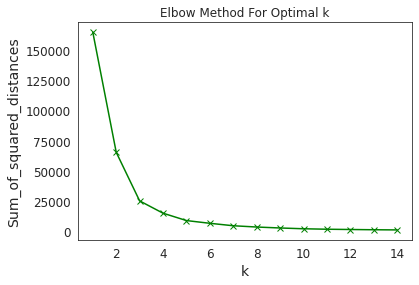

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Berdasarkan visualisasi terlihat bahwa nilai k paling optimal adalah 4, hal ini dikarenakan pada k=4 nilai rerata jumlah kuadrat jarak mulai turun secara signifikan terhadap pusat klaster.

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(music_features)

KMeans(n_clusters=4)

Dalam melakukan visualisasi hasil clustering, kami menggunakan algoritma PCA dan t-SNE untuk mengurangi dimensi data agar menjadi 2 dimensi 

In [ ]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(music_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(music_features)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


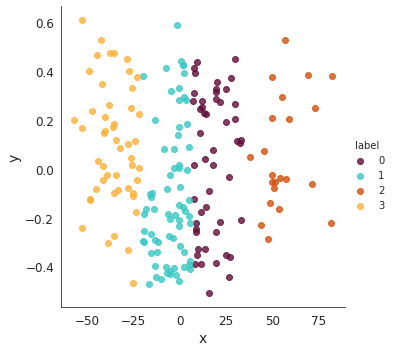

In [ ]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

Dengan menggunakan algoritma KNN dapat terlihat bahwa hasil dari clustering sesuai dengan banyaknya cluster yang ditentukan yaitu 4 telah terbentuk dan menunjukkan pengelompokkan tiap data sesuai dengan jarak yang dimiliki tiap features. Pada grafik juga hanya sedikit yang mengalami overlap. Dari grafik juga diketahui bahwa label dengan cluster 1 dan 0 memiliki jarak yang dekat. Begitu pula dengan label 0 dan 2 serta label 1 dan 3. Dimana label 1 merupakan mood Happy dan label 0 mood Romance. Label 2 adalah mood chill dan label 3 adalah mood Sad. 

In [ ]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(music_features)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


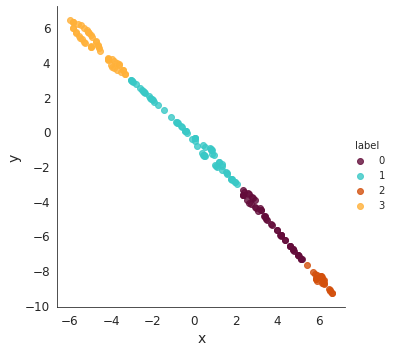

In [ ]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

Clustering menggunakan algortima TSNE juga menunjukkan cluster, namun lebih terlihat overlap pada tiap label yang telah terbentuk. 

In [ ]:
pca.explained_variance_ratio_

array([9.99853969e-01, 9.04401547e-05])

In [ ]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=music_features.columns,index = ['PC-1','PC-2']))

      danceability    energy   valence     tempo
PC-1     -0.001030  0.000888 -0.000304  0.999999
PC-2     -0.332788 -0.464492 -0.820670 -0.000180


In [ ]:
playlist_df['label'] = y_kmeans

# shuffle dataset

songs = playlist_df.sample(frac=1)
songs['label'].value_counts()

1    70
0    50
3    49
2    22
Name: label, dtype: int64

Total data yang telah dikelompokkan berdasarkan label 


*   Label 0 = 50 
*   Label 1 = 70
*   Label 2 = 22
*   Label 3 = 49





Menentukan Parameter dan melihat lebih detail hasil clustering per label

In [ ]:
#get the parameter based on mood playlist 
sad = pd.read_csv("/content/drive/MyDrive/Tugas Frequent Data Mining/spotify_sad.csv")
#sad.info()
sad = sad.drop(['Unnamed: 0','popularity','key','mode','duration_ms','time_signature','loudness','speechiness','instrumentalness',
                'liveness'],axis=1)
sad.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


danceability      0.523875
energy            0.358202
valence           0.289284
tempo           116.002725
dtype: float64

In [ ]:
happy = pd.read_csv("/content/drive/MyDrive/Tugas Frequent Data Mining/spotify_happy.csv")
happy = happy.drop(['Unnamed: 0','popularity','key','mode','duration_ms','time_signature','loudness','speechiness','instrumentalness',
                'liveness'],axis=1)
happy.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


danceability      0.70657
energy            0.72004
valence           0.61949
tempo           118.08123
dtype: float64

In [ ]:
chill = pd.read_csv("/content/drive/MyDrive/Tugas Frequent Data Mining/spotify_chill.csv")
chill = chill.drop(['Unnamed: 0','popularity','key','mode','duration_ms','time_signature','loudness','speechiness','instrumentalness',
                'liveness'],axis=1)
chill.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


danceability      0.633760
energy            0.484220
valence           0.431648
tempo           117.468860
dtype: float64

In [ ]:
romance = pd.read_csv("/content/drive/MyDrive/Tugas Frequent Data Mining/spotify_romance.csv")
romance = romance.drop(['Unnamed: 0','popularity','key','mode','duration_ms','time_signature','loudness','speechiness','instrumentalness',
                'liveness'],axis=1)
romance.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


danceability      0.569100
energy            0.507750
valence           0.360536
tempo           116.065020
dtype: float64

Mendapatkan parameter berdasarkan playlist yang terdapat di spotify. Kami melihat parameter berdasarkan rerata dari features dancebility, energy, valence, dan tempo. Kami mengelompokkan mood menjadi sad, happy, chill, dan romance.

In [ ]:
songs

,artist,album,track_name,popularity,danceability,energy,loudness,valence,tempo,duration_ms,label
72,Pearl Jam,Ten,Alive,75,0.284,0.875,-6.069,0.595,75.009,340907,3
24,Bobby Helms,Jingle Bell Rock/Captain Santa Claus (And His ...,Jingle Bell Rock,87,0.754,0.424,-8.463,0.806,119.705,130973,1
48,Sinéad O'Connor,I Do Not Want What I Haven't Got,Nothing Compares 2 U,73,0.512,0.574,-7.016,0.161,119.917,280040,1
4,Budi Doremi,Tak Kan Hilang,Tak Kan Hilang,75,0.527,0.258,-9.499,0.347,139.928,241714,0
45,Sam Smith,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,0.714,0.472,-7.375,0.238,131.121,156943,0
...,...,...,...,...,...,...,...,...,...,...,...
12,Tom Odell,Long Way Down,Another Love,93,0.445,0.537,-8.532,0.131,122.769,244360,1
69,Daddy Cool,Daddy Who? Daddy Cool (40th Anniversary Edition),Eagle Rock - 2011 Remaster,59,0.618,0.776,-5.160,0.674,125.536,250067,1
55,Paul Simon,Graceland (25th Anniversary Deluxe Edition),You Can Call Me Al,74,0.776,0.763,-8.124,0.820,128.433,280000,0
78,ICEHOUSE,White Heat: 30 Hits,Great Southern Land,61,0.719,0.842,-5.603,0.421,120.147,317240,1


In [ ]:
songs[songs['label']==1].tail(70) #menunjukkan daftar lagu yang masuk pada label 1

,artist,album,track_name,popularity,danceability,energy,loudness,valence,tempo,duration_ms,label
24,Bobby Helms,Jingle Bell Rock/Captain Santa Claus (And His ...,Jingle Bell Rock,87,0.754,0.424,-8.463,0.806,119.705,130973,1
48,Sinéad O'Connor,I Do Not Want What I Haven't Got,Nothing Compares 2 U,73,0.512,0.574,-7.016,0.161,119.917,280040,1
49,Carly Simon,No Secrets,You're so Vain,73,0.659,0.678,-8.180,0.647,106.186,258411,1
23,Rema,Calm Down (with Selena Gomez),Calm Down (with Selena Gomez),92,0.801,0.806,-5.206,0.802,106.999,239318,1
44,Imagine Dragons,Mercury - Acts 1 & 2,Bones,85,0.772,0.750,-3.670,0.587,114.061,165265,1
...,...,...,...,...,...,...,...,...,...,...,...
49,Rizky Febian,Hingga Tua Bersama,Hingga Tua Bersama,76,0.579,0.459,-8.741,0.375,123.956,270926,1
10,ABBA,Arrival,Dancing Queen,82,0.543,0.870,-6.514,0.754,100.804,230400,1
12,Tom Odell,Long Way Down,Another Love,93,0.445,0.537,-8.532,0.131,122.769,244360,1
69,Daddy Cool,Daddy Who? Daddy Cool (40th Anniversary Edition),Eagle Rock - 2011 Remaster,59,0.618,0.776,-5.160,0.674,125.536,250067,1


In [ ]:
songs[songs['label']==1].mean() #menunjukkan rerata pada label 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


popularity          74.400000
danceability         0.651929
energy               0.643071
loudness            -7.565500
valence              0.598344
tempo              115.324614
duration_ms     249418.214286
label                1.000000
dtype: float64

Rerata nilai danceability, energy, valence, dan tempo yang dibutuhkan untuk menentukan kategori mood 

In [ ]:
songs[songs['label']==0].tail(50)

,artist,album,track_name,popularity,danceability,energy,loudness,valence,tempo,duration_ms,label
4,Budi Doremi,Tak Kan Hilang,Tak Kan Hilang,75,0.527,0.258,-9.499,0.3470,139.928,241714,0
45,Sam Smith,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,0.714,0.472,-7.375,0.2380,131.121,156943,0
17,Wham!,The Final,Careless Whisper,59,0.583,0.545,-11.698,0.8010,153.249,302600,0
16,Eagles,Hotel California (2013 Remaster),Hotel California - 2013 Remaster,83,0.579,0.508,-9.484,0.6090,147.125,391376,0
3,Feby Putri,Runtuh,Runtuh,80,0.593,0.287,-13.164,0.1910,127.783,223974,0
5,Soegi Bornean,Asmalibrasi,Asmalibrasi,80,0.721,0.565,-6.208,0.7940,139.941,254862,0
90,Lenny Kravitz,Are You Gonna Go My Way,Are You Gonna Go My Way,74,0.619,0.670,-10.322,0.7770,129.269,211933,0
15,Bob Dylan,Pat Garrett & Billy The Kid (Soundtrack From T...,Knockin' On Heaven's Door,73,0.513,0.396,-13.061,0.2290,140.208,149880,0
14,The Beach Boys,Smiley Smile (Remastered),Good Vibrations - Remastered 2001,69,0.396,0.473,-7.670,0.3850,133.449,219027,0
93,Silverchair,Young Modern,Straight Lines,58,0.543,0.655,-6.392,0.1650,127.471,258413,0


In [ ]:
songs[songs['label']==0].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


popularity          76.94000
danceability         0.57338
energy               0.59470
loudness            -8.10618
valence              0.49345
tempo              137.81014
duration_ms     245466.14000
label                0.00000
dtype: float64

In [ ]:
songs[songs['label']==3].tail(49)

,artist,album,track_name,popularity,danceability,energy,loudness,valence,tempo,duration_ms,label
72,Pearl Jam,Ten,Alive,75,0.284,0.875,-6.069,0.5950,75.009,340907,3
24,Virgoun,Selamat (Selamat Tinggal),Selamat (Selamat Tinggal),75,0.361,0.581,-8.502,0.3720,79.590,313671,3
51,Green Day,Nimrod,Good Riddance (Time of Your Life),76,0.475,0.432,-7.844,0.6480,94.605,153467,3
49,King,Champagne Talk,Maan Meri Jaan,82,0.698,0.505,-8.242,0.3960,95.868,194654,3
40,Vierra,Storytelling,Seandainya,73,0.252,0.827,-4.971,0.4770,93.968,263467,3
7,Lyodra,Sang Dewi,Sang Dewi,80,0.339,0.580,-5.426,0.3190,81.857,247994,3
63,Britney Spears,Oops!... I Did It Again,Oops!...I Did It Again,78,0.751,0.834,-5.444,0.8940,95.053,211160,3
29,Michael Bublé,Christmas,It's Beginning to Look a Lot like Christmas,76,0.331,0.223,-11.274,0.3550,92.896,207200,3
3,John Lennon,Imagine,Imagine - Remastered 2010,77,0.547,0.257,-12.358,0.1690,75.752,187867,3
12,The Easybeats,Friday On My Mind,Friday On My Mind,59,0.374,0.991,-1.101,0.5100,95.105,163293,3


In [ ]:
songs[songs['label']==3].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


popularity          77.591837
danceability         0.551551
energy               0.512980
loudness            -8.895469
valence              0.469624
tempo               84.383020
duration_ms     234293.163265
label                3.000000
dtype: float64

In [ ]:
songs[songs['label']==2].tail(22)

,artist,album,track_name,popularity,danceability,energy,loudness,valence,tempo,duration_ms,label
85,Russell Morris,Fundamentalist,The Real Thing - Acoustic,12,0.433,0.719,-5.164,0.414,165.932,274800,2
25,Reality Club,Anything You Want,Anything You Want,76,0.210,0.580,-7.766,0.313,175.769,236493,2
92,The Verve,Urban Hymns,Bitter Sweet Symphony,79,0.356,0.917,-6.006,0.518,171.176,357267,2
30,Beyoncé,I AM...SASHA FIERCE,Single Ladies (Put a Ring on It),67,0.426,0.584,-5.293,0.272,193.438,192587,2
34,Rosa Linn,SNAP PACK,SNAP,92,0.565,0.636,-8.198,0.525,170.010,179551,2
6,Stacey Ryan,Fall In Love Alone,Fall In Love Alone,83,0.676,0.625,-5.455,0.522,171.883,205428,2
9,Stephen Sanchez,Easy On My Eyes,Until I Found You,84,0.346,0.500,-6.097,0.191,202.466,176667,2
28,Cold Chisel,The Best of Cold Chisel - All for You,Khe Sanh - 2011 Remastered,63,0.474,0.918,-4.210,0.655,164.049,254045,2
39,Ariana Grande,Santa Tell Me,Santa Tell Me,86,0.525,0.621,-7.364,0.591,191.900,204093,2
32,Harry Styles,Harry's House,As It Was,91,0.520,0.731,-5.338,0.662,173.930,167303,2


In [ ]:
songs[songs['label']==2].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


popularity          75.409091
danceability         0.446682
energy               0.605818
loudness            -7.135636
valence              0.485045
tempo              176.599682
duration_ms     232592.772727
label                2.000000
dtype: float64

# Prediksi label mood 

Label yang telah didapatkan pada hasil clustering menjadi target yang akan menentukan akurasi hasil dari prediksi model. Dalam bagian ini kami coba membandingkan 4 algoritma prediksi yaitu Random Forest, KNN, SVM, dan MLP. Kami membagi data untuk training dan testing yaitu (70:30)

In [ ]:
#algoritma random forest untuk clustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = music_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) #membagi data menjadi data training dan data testing

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

In [ ]:
#menampilkan confusion matrix 
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Label yang semula digunakan untuk melabeli cluster kami ganti sesuai dengan kategori mood Romance, Happy, Chill, dan Sad dengan melihat parameter yang telah didapatkan. 

Confusion matrix, without normalization
[[16  0  0  0]
 [ 0 25  0  0]
 [ 0  0  4  0]
 [ 0  0  0 19]]


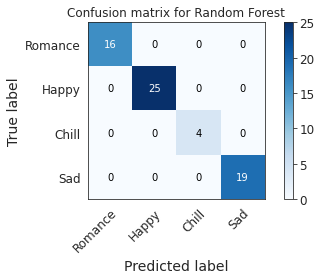

In [ ]:
# Confusion matrix
definitions = ['Romance','Happy','Chill','Sad'] 
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

Dari hasil plot confusion matrix didapatkan bahwa model telah berhasil melakukan clustering sesuai dengan music features yang telah ditentukan. Dari confusion matrix menunjukkan bahwa mood happy paling banyak benar. 

In [ ]:
# View a list of the features and their importance scores
features = music_features.columns
list(zip(music_features[features], rfc.feature_importances_))

[('danceability', 0.10437931495541028),
 ('energy', 0.0563317514081531),
 ('valence', 0.05227609808285854),
 ('tempo', 0.787012835553578)]

Pada algoritma random forest dapat dilihat bahwa features yang penting diantara 4 features adalah tempo. Hal ini dapat dilihat jika lagu yang ada pada playlist rata rata memiliki tempo yang tingi sehingga nilai pada features tempo pun tinggi. 

In [ ]:
#training model dengan algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[16  0  0  0]
 [ 0 25  0  0]
 [ 0  0  4  0]
 [ 0  0  0 19]]


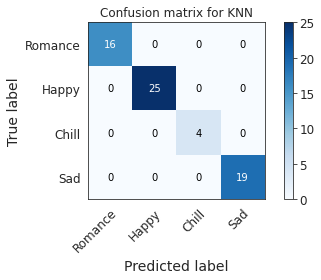

In [ ]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

Dari hasil plot confusion matrix didapatkan bahwa model telah berhasil melakukan clustering sesuai dengan music features yang telah ditentukan. Dari confusion matrix menunjukkan bahwa mood happy paling banyak benar. 

In [ ]:
#Training model dengan algoritma SVM 
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[16  0  0  0]
 [ 0 25  0  0]
 [ 0  0  4  0]
 [ 0  0  0 19]]


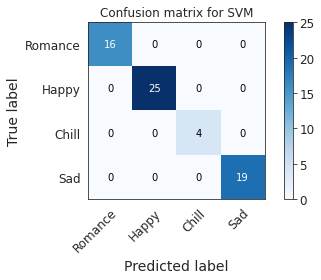

In [ ]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

Dari hasil plot confusion matrix didapatkan bahwa model telah berhasil melakukan clustering sesuai dengan music features yang telah ditentukan. Dari confusion matrix menunjukkan bahwa mood happy paling banyak benar. 

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [ ]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[11  5  0  0]
 [ 5 20  0  0]
 [ 3  1  0  0]
 [ 0 19  0  0]]


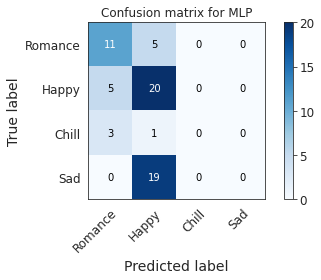

In [ ]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

Dari hasil plot confusion matrix didapatkan bahwa model mengalami banyak kesahalan prediksi. Terlihat bahwa mood sad diklasifikasikan sebagai happy dan mood chill dipreksikan menjadi romance dan happy mood. Hanya 2 feature yang benar diklasifikasikan yaitu mood romance dan happy. 

# Akurasi tiap model

In [ ]:
#Akurasi pada model MLP
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP') 

              precision    recall  f1-score   support

     Romance       0.58      0.69      0.63        16
       Happy       0.44      0.80      0.57        25
       Chill       0.00      0.00      0.00         4
         Sad       0.00      0.00      0.00        19

    accuracy                           0.48        64
   macro avg       0.26      0.37      0.30        64
weighted avg       0.32      0.48      0.38        64
MLP


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Akurasi pada model SVM 
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

     Romance       1.00      1.00      1.00        16
       Happy       1.00      1.00      1.00        25
       Chill       1.00      1.00      1.00         4
         Sad       1.00      1.00      1.00        19

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64
SVM


In [ ]:
#Akurasi pada model KNN
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

     Romance       1.00      1.00      1.00        16
       Happy       1.00      1.00      1.00        25
       Chill       1.00      1.00      1.00         4
         Sad       1.00      1.00      1.00        19

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64
KNN


In [ ]:
#Akurasi pada model Random Forest 
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

     Romance       1.00      1.00      1.00        16
       Happy       1.00      1.00      1.00        25
       Chill       1.00      1.00      1.00         4
         Sad       1.00      1.00      1.00        19

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64
forest


Pada ketiga model didapatkan akurasi yang sama pada model KNN, SVM, dan Random Forest. Accuracy yang rendah adalah pada model MLP. 

In [ ]:
songs.to_csv("data with mood.csv")#export to csv to get visualization 

# Create new column based on 'label' column value

Export CSV untuk melakukan visualisasi insight yang ditemukan

In [ ]:
def Mood(row):  
    if row['label'] == 0:
      return 'Romance'
    elif row['label'] == 1:
      return 'Happy'
    elif row['label'] == 2:
      return 'Chill'
    elif row['label'] == 3:
      return 'Sad'

songs['Mood'] = songs.apply(lambda row: Mood(row), axis=1)

# new dataframe with 'Mood' column
songs.head()